In [1]:
import math
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
l2w = 'data/S2A_MSI_2020_03_21_16_05_11_T17PKK_L2W.nc'

In [3]:
nc = Dataset(l2w)
ds = list(nc.variables.keys())

#['lon', 'lat', 'l2_flags', 'spm_nechad2016'] 
dataset = ds[3]
print('reading dataset: ', dataset)
data = nc.variables[dataset][:]
print(data.shape)
print(data.dtype)

print('\n')
print(f"min: {np.nanmin(data)}, max: {np.nanmax(data)}, mean: {np.nanmean(data)}")

reading dataset:  spm_nechad2016
(2946, 2718)
float32


min: -3.7036550045013428, max: 57.71449661254883, mean: 2.331603527069092


In [4]:
values = data.flatten()
print(f"data size: {data.shape}, \ntotal elements     : {len(values)}")
values = values[~np.isnan(values)]
print(f"elements not masked: {len(values)}")
values.shape
b = values < 0
print(f"elements < 0       :   {len(values[b])}")

data size: (2946, 2718), 
total elements     : 8007228
elements not masked: 1449154
elements < 0       :   25649


### Plotting with Colormaps
[Tutorial](https://matplotlib.org/3.2.1/tutorials/colors/colormapnorms.html#sphx-glr-tutorials-colors-colormapnorms-py)

In [5]:
def load_colormap(filename):
    """Load a colormap defined in a text file
    filename is the .csv file name located in the path.
    """
    try:
        color_map_values = pd.read_csv(filename).to_numpy()/255.
        colormap = ListedColormap(color_map_values)
    except IOError:
        print(f"Cannot load colormap {filename}")
        raise
    colormap.set_bad("gray") # color of missing pixels
    colormap.set_under("white") # color of background, necessary if you want to use
    # this colormap directly with hp.mollview(m, cmap=colormap)
    # healpy tutorial see:https://healpy.readthedocs.io/en/latest/tutorial.html
    return colormap

In [6]:
cmp = load_colormap('planck_parchment_rgb.csv')

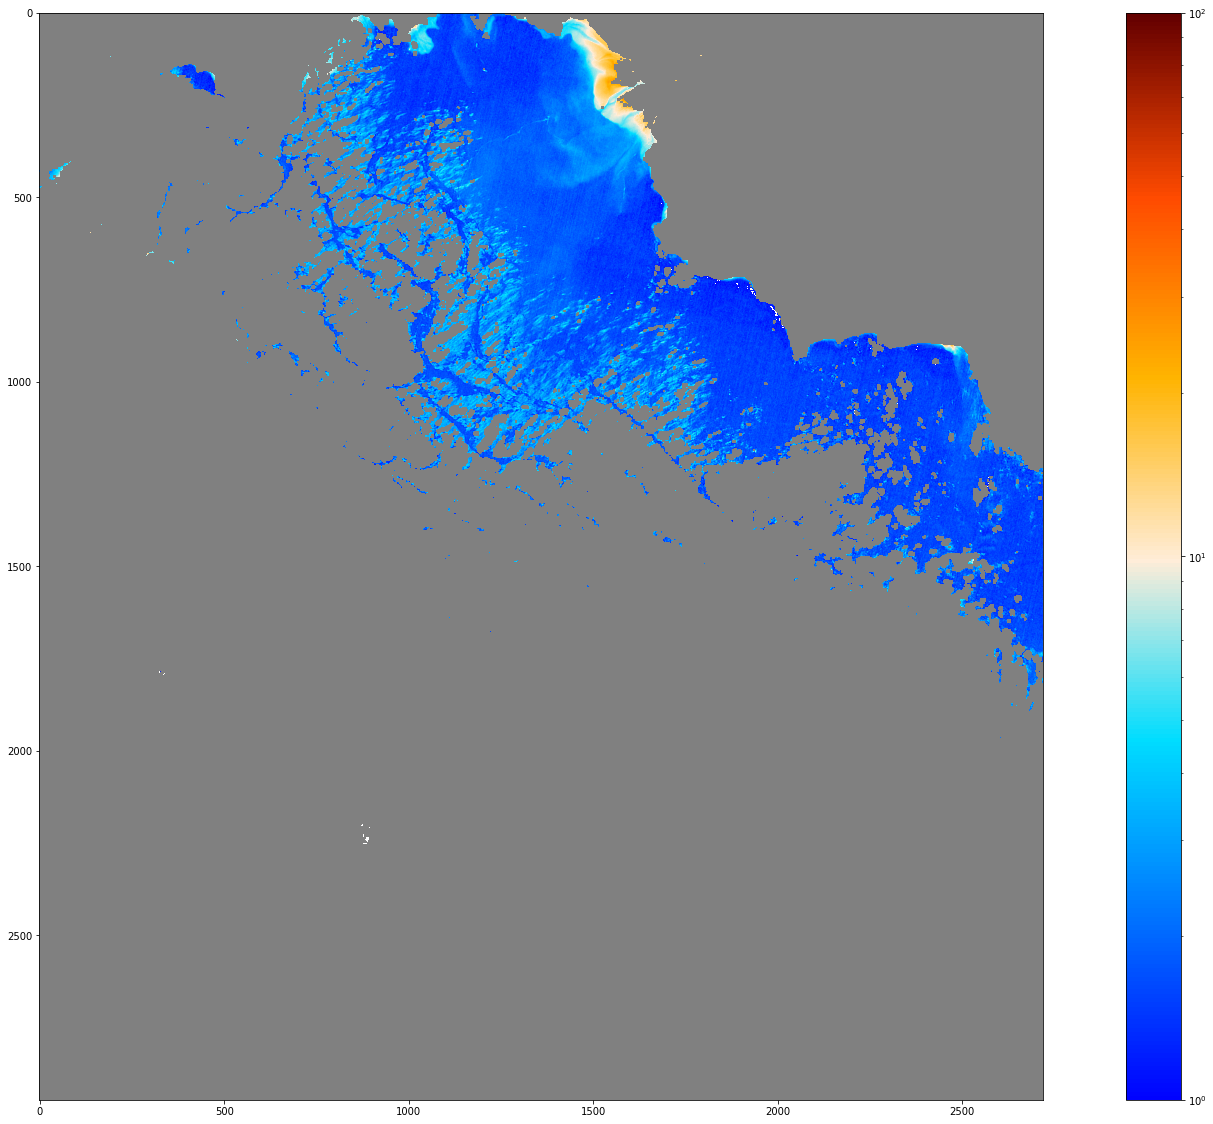

In [164]:
from matplotlib.colors import Normalize, LogNorm 
# Plot the green band using a non-default color ramp & a color bar
# see also: https://matplotlib.org/users/colormaps.html

fig = plt.imshow(data, norm=LogNorm(1,100))
#vmin=Z.min(), vmax=Z.max()
#fig = plt.imshow(data, norm=Normalize(1,100))
fig.set_cmap(cmp)
plt.rcParams["figure.figsize"] = (30,20)
plt.colorbar()
plt.show()
#https://matplotlib.org/3.2.1/tutorials/colors/colormapnorms.html#sphx-glr-tutorials-colors-colormapnorms-py

### Normalizing Data

In [118]:
from sklearn.preprocessing import minmax_scale, scale

min = np.nanmin(data)
max = np.nanmax(data)
dn = np.copy(data)
#data_normalized = minmax_scale(data, feature_range=(0, 100), axis=0, copy=True)
data_normalized = (dn-min)/(max-min)
#data_normalized = scale(data, axis=0, with_mean=True, with_std=True, copy=True )

#data_normalized[data_normalized < 0] = 0
data_normalized= np.log(data_normalized)

print(f"min: {np.nanmin(data_normalized)}, max: {np.nanmax(data_normalized)}, mean: {np.nanmean(data_normalized)}")

min: -inf, max: 0.0, mean: -inf


/Users/angelasindic/miniconda3/envs/cola/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
